In [1]:
### https://www.geeksforgeeks.org/create-a-vignette-filter-using-python-opencv/

import numpy as np 
import cv2 
import matplotlib.pyplot as plt

#reading the image
input_image = cv2.imread('food.jpg') 

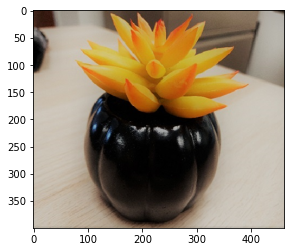

In [2]:
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))

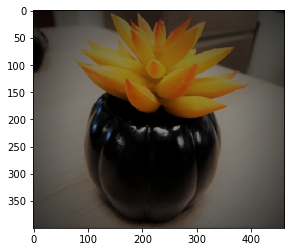

In [3]:
# Extracting the height and width of an image
rows, cols = input_image.shape[:2] 

# generating vignette mask using Gaussian
# resultant_kernels 
X_resultant_kernel = cv2.getGaussianKernel(cols,200) 
Y_resultant_kernel = cv2.getGaussianKernel(rows,200) 

#generating resultant_kernel matrix
resultant_kernel = Y_resultant_kernel * X_resultant_kernel.T 

#creating mask and normalising by using np.linalg 
# function 
mask = 255 * resultant_kernel / np.linalg.norm(resultant_kernel) 
vignette = np.copy(input_image) 

# applying the mask to each channel in the input image 
for i in range(3): 
    vignette[:,:,i] = vignette[:,:,i] * mask 


#displaying the vignette filter image
# yo cv2.imwrite('food_vignette.png', vignette)
plt.imshow(cv2.cvtColor(vignette, cv2.COLOR_BGR2RGB))

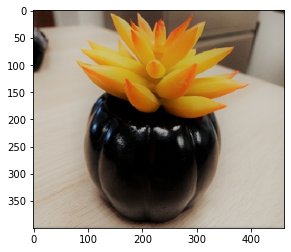

In [4]:
#========================================================================
# Extracting the height and width of an image
rows, cols = vignette.shape[:2] 

# generating vignette mask using Gaussian
# resultant_kernels 
X_resultant_kernel = cv2.getGaussianKernel(cols,200) 
Y_resultant_kernel = cv2.getGaussianKernel(rows,200) 
 
mask = np.linalg.norm(resultant_kernel) / (255 * resultant_kernel)
output = np.copy(vignette) 

for i in range(3): 
    output[:,:,i] = output[:,:,i] * mask 

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))